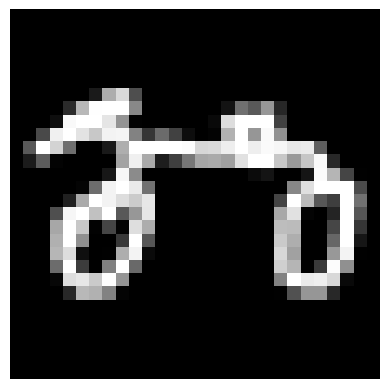

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Load the data
array_data = np.load('C:/demo/classfier_cnn/data/full_numpy_bitmap_bicycle.npy')

# Extract the first image
first_image = array_data[16].reshape(28, 28)  # Assuming each image is 28x28 pixels (adjust as per your data)

# Display the first image
plt.imshow(first_image, cmap='gray')
plt.axis('off')  # Optional: turn off axis numbers and ticks
plt.show()


In [16]:
import numpy as np
from sklearn.model_selection import train_test_split

# List of file paths for the 10 classes
file_paths = [
    'C:/demo/classfier_cnn/data/The Eiffel Tower.npy',
    'C:/demo/classfier_cnn/data/full_numpy_bitmap_basketball.npy',
    'C:/demo/classfier_cnn/data/full_numpy_bitmap_baseball.npy',
    'C:/demo/classfier_cnn/data/full_numpy_bitmap_bathtub.npy',
    'C:/demo/classfier_cnn/data/full_numpy_bitmap_bicycle.npy',
    'C:/demo/classfier_cnn/data/full_numpy_bitmap_apple.npy',
    'C:/demo/classfier_cnn/data/full_numpy_bitmap_bat.npy',
    'C:/demo/classfier_cnn/data/full_numpy_bitmap_alarm clock.npy',
    'C:/demo/classfier_cnn/data/full_numpy_bitmap_airplane.npy',
    'C:/demo/classfier_cnn/data/full_numpy_bitmap_book.npy'
]

# Function to load and preprocess data
def load_data(file_paths, num_samples=50000):
    data = []
    labels = []
    for idx, file_path in enumerate(file_paths):
        array_data = np.load(file_path)
        # Get the first num_samples samples
        first_samples = array_data[:num_samples]
        data.append(first_samples)
        # Create labels for these samples
        labels.append(np.full((num_samples,), idx))
    return np.vstack(data), np.concatenate(labels)

# Load the data
data, labels = load_data(file_paths)

# Normalize the data
data = data.astype('float32') / 255.0

# Reshape the data if necessary (e.g., if the images are 28x28 pixels)
data = data.reshape(-1, 1,28, 28)  # Assuming the images are 28x28 pixels and grayscale

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

# Print the shapes of the resulting datasets
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)


X_train shape: (400000, 1, 28, 28)
X_test shape: (100000, 1, 28, 28)
y_train shape: (400000,)
y_test shape: (100000,)


In [4]:
y_test
unique_elements = np.unique(y_test)
print(unique_elements)

[0 1 2 3 4 5 6 7 8 9]


In [2]:
# Define the class labels
class_labels = [
    'The Eiffel Tower',
    'full_numpy_bitmap_basketball',
    'full_numpy_bitmap_baseball',
    'full_numpy_bitmap_bathtub',
    'full_numpy_bitmap_bicycle',
    'full_numpy_bitmap_apple',
    'full_numpy_bitmap_bat',
    'full_numpy_bitmap_alarm clock',
    'full_numpy_bitmap_airplane',
    'full_numpy_bitmap_book'
]

# Create the dictionary
class_dict = {i: label for i, label in enumerate(class_labels)}

# Print the dictionary
print(class_dict)

{0: 'The Eiffel Tower', 1: 'full_numpy_bitmap_basketball', 2: 'full_numpy_bitmap_baseball', 3: 'full_numpy_bitmap_bathtub', 4: 'full_numpy_bitmap_bicycle', 5: 'full_numpy_bitmap_apple', 6: 'full_numpy_bitmap_bat', 7: 'full_numpy_bitmap_alarm clock', 8: 'full_numpy_bitmap_airplane', 9: 'full_numpy_bitmap_book'}


In [6]:
X_test.shape

(100000, 1, 28, 28)

In [41]:
X_test_reshaped = np.reshape(X_test, (100000, 1, 28, 28))
X_train_reshaped = np.reshape(X_train, (400000, 1, 28, 28))

# Print the shape after reshaping
print("X_train shape after reshaping:", X_train_reshaped.shape)
print("X_test shape after reshaping:", X_test_reshaped.shape)

X_train shape after reshaping: torch.Size([400000, 1, 28, 28])
X_test shape after reshaping: torch.Size([100000, 1, 28, 28])


In [8]:
X_train_reshaped[1].shape

(1, 28, 28)

In [48]:
X_test_reshaped = np.reshape(X_test[9], (1, 28, 28))

# Print the shape after reshaping
print("X_test[9] shape after reshaping:", X_test_reshaped.shape)

X_test[9] shape after reshaping: (1, 28, 28)


In [42]:
import torch
from torch.utils.data import DataLoader, TensorDataset

# Assume X_train, y_train, X_test, y_test are already defined as numpy arrays or tensors

# Convert data to tensors if they are numpy arrays
if isinstance(X_train_reshaped, np.ndarray):
    X_train = torch.tensor(X_train, dtype=torch.float32) #dtype=torch.float32
if isinstance(y_train, np.ndarray):
    y_train = torch.tensor(y_train, dtype=torch.int64)
if isinstance(X_test_reshaped, np.ndarray):
    X_test = torch.tensor(X_test, dtype=torch.float32)
if isinstance(y_test, np.ndarray):
    y_test = torch.tensor(y_test, dtype=torch.int64)

# Combine data and labels into TensorDataset
train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)

# Setup the batch size hyperparameter
BATCH_SIZE = 32

# Turn datasets into iterables (batches)
train_dataloader = DataLoader(train_dataset, # dataset to turn into iterable
    batch_size=BATCH_SIZE, # how many samples per batch? 
    shuffle=True # shuffle data every epoch?
)

test_dataloader = DataLoader(test_dataset,
    batch_size=BATCH_SIZE,
    shuffle=False # don't necessarily have to shuffle the testing data
)


In [44]:
for X, y in train_dataloader:
    print(X.shape)
    break

torch.Size([32, 1, 28, 28])


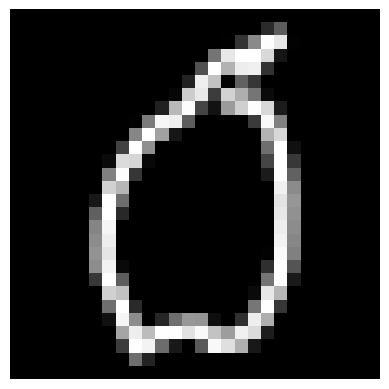

In [45]:
import matplotlib.pyplot as plt
import torch
image_to_plot = X_train[5]  # Assuming you want to plot the second image (index 1)

# Plot the image directly using PyTorch and matplotlib
plt.imshow(image_to_plot.squeeze(0), cmap='gray')  # Squeeze along the channel dimension
plt.axis('off')  # Optional: turn off axis numbers and ticks
plt.show()

In [12]:
# Let's check out what we've created
print(f"Dataloaders: {train_dataloader, test_dataloader}") 
print(f"Length of train dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Length of test dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}")

Dataloaders: (<torch.utils.data.dataloader.DataLoader object at 0x00000287FF932A50>, <torch.utils.data.dataloader.DataLoader object at 0x0000028820864470>)
Length of train dataloader: 12500 batches of 32
Length of test dataloader: 3125 batches of 32


In [13]:
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

In [14]:
train_labels_batch

tensor([6, 2, 4, 9, 0, 9, 3, 4, 1, 7, 5, 1, 8, 2, 3, 8, 2, 2, 9, 1, 9, 3, 9, 0,
        0, 9, 2, 8, 3, 1, 4, 1])

In [15]:
class_dict[1]

'full_numpy_bitmap_basketball'

In [30]:
import torch
from torch import nn, optim
from torch.utils.data import DataLoader
from tqdm.auto import tqdm
import numpy as np

class DoodleClassModel04(nn.Module):
    def __init__(self, input_channels: int, output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Conv2d(in_channels=input_channels, out_channels=32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(32),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Dropout(0.4),

            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(64),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Dropout(0.4),

            nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(128),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Dropout(0.4),

            nn.Flatten(),
            nn.Linear(in_features=128*3*3, out_features=256),
            nn.ReLU(),
            nn.BatchNorm1d(256),
            nn.Dropout(0.4),
            nn.Linear(in_features=256, out_features=output_shape)
        )
    
    def forward(self, x):
        return self.layer_stack(x)

# Define accuracy function
def accuracy_fn(y_true, y_pred):
    correct = (y_true == y_pred).sum().item()
    return (correct / len(y_true)) * 100

torch.manual_seed(42)

# Check if GPU is available and use it
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Instantiate the model
model_2 = DoodleClassModel04(input_channels=1, output_shape=len(class_dict)) # For grayscale images
model_2.to(device)

# Loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.AdamW(model_2.parameters(), lr=0.001, weight_decay=1e-5)

# Learning rate scheduler
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', patience=5, verbose=True)

# Data loading (assuming train_dataloader and test_dataloader are defined)
epochs = 30

# Training loop
for epoch in tqdm(range(epochs)):
    model_2.train()
    train_loss = 0
    for X, y in train_dataloader:
        X, y = X.to(device), y.to(device)

        optimizer.zero_grad()
        y_pred = model_2(X)
        loss = loss_fn(y_pred, y)
        train_loss += loss.item()
        loss.backward()
        optimizer.step()
    
    train_loss /= len(train_dataloader)
    
    # Evaluation
    model_2.eval()
    test_loss, test_acc = 0, 0
    with torch.inference_mode():
        for X, y in test_dataloader:
            X, y = X.to(device), y.to(device)
            test_pred = model_2(X)
            loss = loss_fn(test_pred, y)
            test_loss += loss.item()
            test_acc += accuracy_fn(y, test_pred.argmax(dim=1))
    
    test_loss /= len(test_dataloader)
    test_acc /= len(test_dataloader)

    scheduler.step(test_loss)  # Update the scheduler

    print(f"Epoch {epoch+1}/{epochs} | Train Loss: {train_loss:.4f} | Test Loss: {test_loss:.4f} | Test Acc: {test_acc:.2f}%")

print("Training Complete")


c:\test001\ttt\Lib\site-packages\torch\optim\lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "
  3%|▎         | 1/30 [00:27<13:06, 27.13s/it]

Epoch 1/30 | Train Loss: 0.3991 | Test Loss: 0.2465 | Test Acc: 91.94%


  7%|▋         | 2/30 [00:53<12:31, 26.83s/it]

Epoch 2/30 | Train Loss: 0.3024 | Test Loss: 0.2112 | Test Acc: 93.17%


 10%|█         | 3/30 [01:20<11:58, 26.62s/it]

Epoch 3/30 | Train Loss: 0.2786 | Test Loss: 0.2038 | Test Acc: 93.40%


 13%|█▎        | 4/30 [01:46<11:28, 26.48s/it]

Epoch 4/30 | Train Loss: 0.2655 | Test Loss: 0.1975 | Test Acc: 93.69%


 17%|█▋        | 5/30 [02:19<11:59, 28.77s/it]

Epoch 5/30 | Train Loss: 0.2582 | Test Loss: 0.1932 | Test Acc: 93.83%


 20%|██        | 6/30 [02:53<12:17, 30.73s/it]

Epoch 6/30 | Train Loss: 0.2522 | Test Loss: 0.1904 | Test Acc: 93.87%


 23%|██▎       | 7/30 [03:32<12:47, 33.39s/it]

Epoch 7/30 | Train Loss: 0.2477 | Test Loss: 0.1853 | Test Acc: 94.01%


 27%|██▋       | 8/30 [04:15<13:21, 36.45s/it]

Epoch 8/30 | Train Loss: 0.2439 | Test Loss: 0.1882 | Test Acc: 93.94%


 30%|███       | 9/30 [04:49<12:30, 35.73s/it]

Epoch 9/30 | Train Loss: 0.2405 | Test Loss: 0.1847 | Test Acc: 94.04%


 33%|███▎      | 10/30 [05:26<12:00, 36.03s/it]

Epoch 10/30 | Train Loss: 0.2382 | Test Loss: 0.1836 | Test Acc: 94.05%


 37%|███▋      | 11/30 [05:58<11:00, 34.78s/it]

Epoch 11/30 | Train Loss: 0.2368 | Test Loss: 0.1829 | Test Acc: 94.14%


 40%|████      | 12/30 [06:37<10:52, 36.23s/it]

Epoch 12/30 | Train Loss: 0.2344 | Test Loss: 0.1799 | Test Acc: 94.24%


 43%|████▎     | 13/30 [07:04<09:25, 33.26s/it]

Epoch 13/30 | Train Loss: 0.2320 | Test Loss: 0.1813 | Test Acc: 94.15%


 47%|████▋     | 14/30 [07:30<08:19, 31.19s/it]

Epoch 14/30 | Train Loss: 0.2298 | Test Loss: 0.1788 | Test Acc: 94.28%


 50%|█████     | 15/30 [08:06<08:06, 32.42s/it]

Epoch 15/30 | Train Loss: 0.2295 | Test Loss: 0.1790 | Test Acc: 94.27%


 53%|█████▎    | 16/30 [08:48<08:17, 35.57s/it]

Epoch 16/30 | Train Loss: 0.2278 | Test Loss: 0.1784 | Test Acc: 94.26%


 57%|█████▋    | 17/30 [09:31<08:11, 37.80s/it]

Epoch 17/30 | Train Loss: 0.2281 | Test Loss: 0.1758 | Test Acc: 94.32%


 60%|██████    | 18/30 [10:14<07:51, 39.33s/it]

Epoch 18/30 | Train Loss: 0.2266 | Test Loss: 0.1747 | Test Acc: 94.34%


 63%|██████▎   | 19/30 [10:58<07:25, 40.53s/it]

Epoch 19/30 | Train Loss: 0.2235 | Test Loss: 0.1767 | Test Acc: 94.32%


 67%|██████▋   | 20/30 [11:40<06:51, 41.17s/it]

Epoch 20/30 | Train Loss: 0.2237 | Test Loss: 0.1749 | Test Acc: 94.35%


 70%|███████   | 21/30 [12:23<06:14, 41.64s/it]

Epoch 21/30 | Train Loss: 0.2232 | Test Loss: 0.1739 | Test Acc: 94.38%


 73%|███████▎  | 22/30 [13:06<05:36, 42.02s/it]

Epoch 22/30 | Train Loss: 0.2225 | Test Loss: 0.1763 | Test Acc: 94.33%


 77%|███████▋  | 23/30 [13:49<04:55, 42.20s/it]

Epoch 23/30 | Train Loss: 0.2222 | Test Loss: 0.1723 | Test Acc: 94.41%


 80%|████████  | 24/30 [14:25<04:03, 40.58s/it]

Epoch 24/30 | Train Loss: 0.2217 | Test Loss: 0.1723 | Test Acc: 94.43%


 83%|████████▎ | 25/30 [14:51<03:00, 36.15s/it]

Epoch 25/30 | Train Loss: 0.2208 | Test Loss: 0.1733 | Test Acc: 94.37%


 87%|████████▋ | 26/30 [15:23<02:19, 34.80s/it]

Epoch 26/30 | Train Loss: 0.2184 | Test Loss: 0.1736 | Test Acc: 94.39%


 90%|█████████ | 27/30 [16:06<01:51, 37.22s/it]

Epoch 27/30 | Train Loss: 0.2200 | Test Loss: 0.1711 | Test Acc: 94.44%


 93%|█████████▎| 28/30 [16:37<01:11, 35.57s/it]

Epoch 28/30 | Train Loss: 0.2176 | Test Loss: 0.1732 | Test Acc: 94.46%


 97%|█████████▋| 29/30 [17:03<00:32, 32.69s/it]

Epoch 29/30 | Train Loss: 0.2183 | Test Loss: 0.1729 | Test Acc: 94.41%


100%|██████████| 30/30 [17:29<00:00, 35.00s/it]

Epoch 30/30 | Train Loss: 0.2169 | Test Loss: 0.1708 | Test Acc: 94.45%
Training Complete


In [18]:
device

device(type='cuda')

In [31]:
torch.manual_seed(42)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

def eval_model(model: torch.nn.Module, 
               data_loader: torch.utils.data.DataLoader, 
               loss_fn: torch.nn.Module, 
               accuracy_fn):
    """Returns a dictionary containing the results of model predicting on data_loader.

    Args:
        model (torch.nn.Module): A PyTorch model capable of making predictions on data_loader.
        data_loader (torch.utils.data.DataLoader): The target dataset to predict on.
        loss_fn (torch.nn.Module): The loss function of model.
        accuracy_fn: An accuracy function to compare the models predictions to the truth labels.

    Returns:
        (dict): Results of model making predictions on data_loader.
    """
    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in data_loader:
            # Move data to the device
            X, y = X.to(device), y.to(device)
            
            # Make predictions with the model
            y_pred = model(X)
            
            # Accumulate the loss and accuracy values per batch
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true=y, 
                                y_pred=y_pred.argmax(dim=1)) # For accuracy, need the prediction labels (logits -> pred_prob -> pred_labels)
        
        # Scale loss and acc to find the average loss/acc per batch
        loss /= len(data_loader)
        acc /= len(data_loader)
        
    return {"model_name": model.__class__.__name__, # only works when model was created with a class
            "model_loss": loss.item(),
            "model_acc": acc}

# Move model to the device
model_2.to(device)

# Calculate model 0 results on test dataset
model_0_results = eval_model(model=model_2, data_loader=test_dataloader,
    loss_fn=loss_fn, accuracy_fn=accuracy_fn
)
model_0_results


{'model_name': 'DoodleClassModel04',
 'model_loss': 0.1708349734544754,
 'model_acc': 94.455}

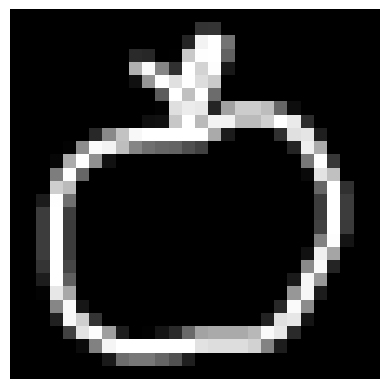

In [46]:
from PIL import Image
import torchvision.transforms as transforms

# Load the sample image
# sample_image_path = 'path_to_your_sample_image.jpg'  # Replace with your actual image path
# sample_image = Image.open(sample_image_path)

array_data = np.load('C:/demo/classfier_cnn/data/full_numpy_bitmap_apple.npy')
# Extract the first image
input_tensor = array_data[9].reshape(28, 28,1)

# Display the first image
plt.imshow(input_tensor, cmap='gray')
plt.axis('off')  # Optional: turn off axis numbers and ticks
plt.show()


In [17]:
import torch
import numpy as np

def preprocess_sample_image(image_array):
    # Normalize the image
    image_array = image_array.astype('float32') / 255.0
    
    # Reshape the image to (1, 1, 28, 28) if it's a single image
    image_array = np.reshape(image_array, (1, 1, 28, 28))
    
    # Convert to torch tensor
    image_tensor = torch.tensor(image_array, dtype=torch.float32)
    
    # Check if CUDA (GPU) is available and move tensor to CUDA device
    if torch.cuda.is_available():
        device = torch.device("cuda")
        image_tensor = image_tensor.to(device)
    
    return image_tensor


In [45]:
# Preprocess the sample image
sample_image_tensor = preprocess_sample_image(image_array)#(input_tensor)

# Make a prediction with the loaded model
with torch.no_grad():
    output = model(sample_image_tensor)
    predicted_class = torch.argmax(output, dim=1).item()

# Print the predicted class

print(f"Predicted class label: {class_dict[predicted_class]}")
print(f"Predicted class index: {predicted_class}")

Predicted class label: full_numpy_bitmap_bat
Predicted class index: 6


In [32]:
torch.save(model_2.state_dict(), './models/cnn_model.pth')

In [18]:
model

DoodleClassModel04(
  (layer_stack): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Dropout(p=0.4, inplace=False)
    (5): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU()
    (7): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (9): Dropout(p=0.4, inplace=False)
    (10): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU()
    (12): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Dropout(p=0.4, inplace=False)
    (15): Flatten(start_dim=1, end_d

In [1]:
class_labels = [
    'The Eiffel Tower',
    'full_numpy_bitmap_basketball',
    'full_numpy_bitmap_baseball',
    'full_numpy_bitmap_bathtub',
    'full_numpy_bitmap_bicycle',
    'full_numpy_bitmap_apple',
    'full_numpy_bitmap_bat',
    'full_numpy_bitmap_alarm clock',
    'full_numpy_bitmap_airplane',
    'full_numpy_bitmap_book'
]

# Create the dictionary
class_dict = {i: label for i, label in enumerate(class_labels)}

# Print the dictionary
print(class_dict)

{0: 'The Eiffel Tower', 1: 'full_numpy_bitmap_basketball', 2: 'full_numpy_bitmap_baseball', 3: 'full_numpy_bitmap_bathtub', 4: 'full_numpy_bitmap_bicycle', 5: 'full_numpy_bitmap_apple', 6: 'full_numpy_bitmap_bat', 7: 'full_numpy_bitmap_alarm clock', 8: 'full_numpy_bitmap_airplane', 9: 'full_numpy_bitmap_book'}


In [2]:
import torch
from torch import nn, optim
from torch.utils.data import DataLoader
from tqdm.auto import tqdm
import numpy as np

class DoodleClassModel04(nn.Module):
    def __init__(self, input_channels: int, output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Conv2d(in_channels=input_channels, out_channels=32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(32),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Dropout(0.4),

            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(64),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Dropout(0.4),

            nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(128),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Dropout(0.4),

            nn.Flatten(),
            nn.Linear(in_features=128*3*3, out_features=256),
            nn.ReLU(),
            nn.BatchNorm1d(256),
            nn.Dropout(0.4),
            nn.Linear(in_features=256, out_features=output_shape)
        )
    
    def forward(self, x):
        return self.layer_stack(x)
    
# Define the input channels and output shape
input_channels = 1  # Assuming grayscale images
output_shape = 10  # Assuming 10 classes for classification

# Initialize the model
model = DoodleClassModel04(input_channels=1, output_shape=len(class_dict))

# Check if CUDA is available and move the model to GPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)

# Load the model weights
model.load_state_dict(torch.load('C:/test001/ttt/cnn_classifier/models/cnn_model.pth', map_location=device))

# Set the model to evaluation mode
model.eval()

# # Example: Load an image and make a prediction
# from PIL import Image
# import torchvision.transforms as transforms

# # Load the image
# image = Image.open('C:/test001/ttt/bat.jpg').convert('L')  # Convert to grayscale

# # Resize the image to 28x28
# image = image.resize((28, 28))

# # Convert the image to a tensor
# transform = transforms.Compose([
#     transforms.ToTensor(),
#     transforms.Normalize((0.5,), (0.5,))
# ])
# image_tensor = transform(image).unsqueeze(0)  # Add batch dimension



c:\test001\ttt\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


DoodleClassModel04(
  (layer_stack): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Dropout(p=0.4, inplace=False)
    (5): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU()
    (7): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (9): Dropout(p=0.4, inplace=False)
    (10): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU()
    (12): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Dropout(p=0.4, inplace=False)
    (15): Flatten(start_dim=1, end_d

(28, 28, 3, 1)


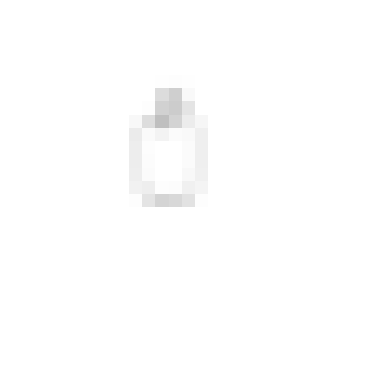

In [5]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

# Load the image
image = Image.open('C:/test001/ttt/cnn_classifier/iamges/apple.jpg')

# Resize the image to 28x28
resized_image = image.resize((28, 28))

# Convert the image to a NumPy array
image_array = np.array(resized_image)

# Ensure the image has the shape (28, 28, 1)
# For grayscale, add a new axis to make it (28, 28, 1)
image_array = np.expand_dims(image_array, axis=-1)

print(np.shape(image_array))
# Display the image
plt.imshow(image_array.squeeze(), cmap='gray')
plt.axis('off')  # Optional: to hide the axis
plt.show()


(678, 834)
(28, 28, 1)


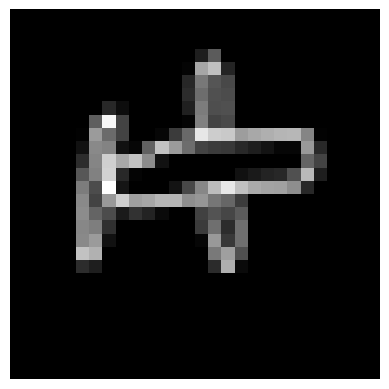

In [20]:
import numpy as np
from PIL import Image
from PIL import Image, ImageOps

# Load the image
image = Image.open('C:/test001/ttt/cnn_classifier/iamges/air.jpg').convert('L')  # Convert to grayscale

# Invert the colors
image = ImageOps.invert(image)
print(np.shape(image))
# Resize the image to 28x28
resized_image = image.resize((28, 28))

# Convert the image to a NumPy array
image_array = np.array(resized_image)

# Ensure the image has the shape (28, 28, 1)
image_array = np.expand_dims(image_array, axis=-1)

print(np.shape(image_array))  # Should output (28, 28, 1)
plt.imshow(image_array.squeeze(), cmap='gray')
plt.axis('off')  # Optional: to hide the axis
plt.show()


In [18]:
# Preprocess the sample image
sample_image_tensor = preprocess_sample_image(image_array)#(input_tensor)

# Make a prediction with the loaded model
with torch.no_grad():
    output = model(sample_image_tensor)
    predicted_class = torch.argmax(output, dim=1).item()

# Print the predicted class

print(f"Predicted class label: {class_dict[predicted_class]}")
print(f"Predicted class index: {predicted_class}")

Predicted class label: full_numpy_bitmap_airplane
Predicted class index: 8


In [14]:
sample_image_tensor.dtype

torch.float32

In [41]:
print(np.shape(input_tensor))

print(np.shape(image_array))

(28, 28, 1)
(28, 28, 1)


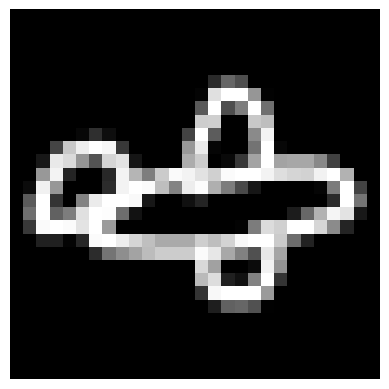

In [95]:
array_data = np.load('C:/demo/classfier_cnn/data/full_numpy_bitmap_airplane.npy')
# Extract the first image
input_tensor = array_data[66].reshape(28, 28,1)

# Display the first image
plt.imshow(input_tensor, cmap='gray')
plt.axis('off')  # Optional: turn off axis numbers and ticks
plt.show()


In [76]:
import math

width = 834
height = 678

gcd = math.gcd(width, height)
print(gcd)
ratio_width = width // gcd
ratio_height = height // gcd

print(f"Ratio: {ratio_width}:{ratio_height}")



6
Ratio: 139:113


In [111]:
from PIL import Image

def resize_with_center_crop(image_path, target_size):
    image = Image.open(image_path)
    old_size = image.size
    ratio = max(old_size) / float(target_size)
    new_size = tuple([int(x / ratio) for x in old_size])
    image = image.resize(new_size, Image.LANCZOS)
    left = (new_size[0] - target_size) / 2
    top = (new_size[1] - target_size) / 2
    right = (new_size[0] + target_size) / 2
    bottom = (new_size[1] + target_size) / 2
    cropped_image = image.crop((left, top, right, bottom))
    return cropped_image

# Example usage
image_path = 'C:/test001/ttt/cnn_classifier/iamges/air.jpg'
target_size = 28  # Specify the target size as a single integer for square cropping
cropped_image = resize_with_center_crop(image_path, target_size)

# Display the cropped image (optional)
cropped_image.show()


In [143]:
from PIL import Image, ImageOps

def resize_with_padding1(image_path, target_size):
    image = Image.open(image_path).convert('L')
    image = ImageOps.invert(image)
    old_size = image.size
    ratio = float(target_size) / max(old_size)
    new_size = tuple([int(x * ratio) for x in old_size])
    image = image.resize(new_size, Image.LANCZOS)

    new_image = Image.new("RGB", (target_size, target_size), (0, 0, 0))
    new_image.paste(image, ((target_size - new_size[0]) // 2, (target_size - new_size[1]) // 2))
    return new_image

# Example usage
image_path = 'C:/test001/ttt/cnn_classifier/iamges/air.jpg'
target_size = 28  # Specify the target size as a single integer for square cropping
padded_image = resize_with_padding1(image_path, target_size)

np.shape(padded_image)
# Display the padded image (optional)
padded_image.show()


In [147]:
from PIL import Image, ImageOps
import numpy as np

def resize_with_padding(image_path, target_size):
    image = Image.open(image_path).convert('L')  # Convert to grayscale
    image = ImageOps.invert(image)  # Invert colors if needed
    old_size = image.size
    ratio = float(target_size) / max(old_size)
    new_size = tuple([int(x * ratio) for x in old_size])
    image = image.resize(new_size, Image.LANCZOS)

    new_image = Image.new("L", (target_size, target_size), 0)  # Create new image with black padding
    new_image.paste(image, ((target_size - new_size[0]) // 2, (target_size - new_size[1]) // 2))
    
    return new_image

# Example usage
image_path = 'C:/test001/ttt/cnn_classifier/iamges/air.jpg'
target_size = 28  # Specify the target size as a single integer for square cropping
padded_image = resize_with_padding(image_path, target_size)

# Convert to NumPy array and ensure shape is (28, 28, 1)
image_array1 = np.array(padded_image)
image_array1 = np.expand_dims(image_array1, axis=-1)

print(np.shape(image_array1))  # Should output (28, 28, 1)
padded_image.show()

(28, 28, 1)


(678, 834)
(28, 28, 1)


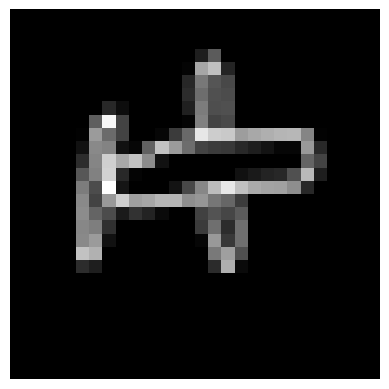

In [165]:
image = Image.open('C:/test001/ttt/cnn_classifier/iamges/air.jpg').convert('L')  # Convert to grayscale

# Invert the colors
image = ImageOps.invert(image)
print(np.shape(image))
# Resize the image to 28x28
resized_image = image.resize((28, 28))

# Convert the image to a NumPy array
image_array = np.array(resized_image)

# Ensure the image has the shape (28, 28, 1)
image_array = np.expand_dims(image_array, axis=-1)

print(np.shape(image_array))  # Should output (28, 28, 1)
plt.imshow(image_array.squeeze(), cmap='gray')
plt.axis('off')  # Optional: to hide the axis
plt.show()

In [166]:
# Preprocess the sample image
sample_image_tensor = preprocess_sample_image(image_array)#(input_tensor)

# Make a prediction with the loaded model
with torch.no_grad():
    output = model(sample_image_tensor)
    predicted_class = torch.argmax(output, dim=1).item()

# Print the predicted class

print(f"Predicted class label: {class_dict[predicted_class]}")
print(f"Predicted class index: {predicted_class}")

Predicted class label: full_numpy_bitmap_airplane
Predicted class index: 8


In [144]:
np.shape(padded_image)

(28, 28, 3)

In [152]:
import torch
import torchvision.models as models

# Example: Define your PyTorch model
# model = models.resnet18(pretrained=True)
# model.eval()

# Example: Export PyTorch model to ONNX
input_shape = (32, 1, 28, 28)  # Example input shape (batch_size, channels, height, width)
dummy_input = torch.randn(input_shape, device='cuda')
output_path = 'model.onnx'
torch.onnx.export(model, dummy_input, output_path, verbose=True, input_names=['input'], output_names=['output'])


In [3]:
import torch

# Assuming your model is already loaded and set to evaluation mode
dummy_input = torch.randn(1, 1, 28, 28, device=device)  # Adjust the input size as needed
torch.onnx.export(model, dummy_input, "model.onnx", input_names=["image"], output_names=["category"])


In [4]:
import onnx
from onnx_coreml import convert

# Load the ONNX model
onnx_model = onnx.load("C:/test001/ttt/cnn_classifier/model.onnx")

# Convert the ONNX model to Core ML
coreml_model = convert(
    model=onnx_model,
    image_input_names=["image"],
    image_output_names=["category"],
    minimum_ios_deployment_target='13'
)

# Save the Core ML model
coreml_model.save("model.mlmodel")


scikit-learn version 1.5.1 is not supported. Minimum required version: 0.17. Maximum required version: 1.1.2. Disabling scikit-learn conversion API.
Failed to load _MLModelProxy: No module named 'coremltools.libcoremlpython'
Fail to import BlobReader from libmilstoragepython. No module named 'coremltools.libmilstoragepython'
Fail to import BlobWriter from libmilstoragepython. No module named 'coremltools.libmilstoragepython'


ModuleNotFoundError: No module named 'coremltools.converters.nnssa'

In [8]:
import coremltools as ct

# Define the new model architecture
input_features = ct.models.datatypes.Array(28, 28)
output_features = ct.models.datatypes.Dictionary(ct.models.datatypes.String)

builder = ct.models.neural_network.NeuralNetworkBuilder(
    input_features=[('image', input_features)],
    output_features=[('category softmax scores', output_features), ('category', ct.models.datatypes.String)]
)

In [9]:
# Add layers to the model
builder.add_convolution(
    name='conv1', 
    kernel_channels=1, 
    output_channels=32, 
    height=3, 
    width=3, 
    stride_height=1, 
    stride_width=1, 
    border_mode='valid', 
    groups=1, 
    W=np.random.rand(32, 1, 3, 3),  # Random weights for example
    b=np.random.rand(32),  # Random biases for example
    has_bias=True, 
    input_name='image', 
    output_name='conv1_output'
)
builder.add_activation(name='relu1', non_linearity='RELU', input_name='conv1_output', output_name='relu1_output')
builder.add_pooling(name='pool1', height=2, width=2, stride_height=2, stride_width=2, layer_type='MAX', input_name='relu1_output', output_name='pool1_output' , padding_type='VALID')

# Save the model
model = ct.models.MLModel(builder.spec)
model.save('new_model.mlmodel')

In [22]:
output_features

Dictionary(String)

In [47]:
import coremltools as ct
import numpy as np

# Define the new model architecture
input_features = ct.models.datatypes.Array(28, 28)
output_features = ct.models.datatypes.Dictionary(ct.models.datatypes.String)

builder = ct.models.neural_network.NeuralNetworkBuilder(
    input_features=[('image', input_features)],
    output_features=[('category softmax scores', output_features), ('category', ct.models.datatypes.String)])

# Add layers to the model
builder.add_convolution(
    name='conv1', 
    kernel_channels=1, 
    output_channels=32, 
    height=3, 
    width=3, 
    stride_height=1, 
    stride_width=1, 
    border_mode='valid', 
    groups=1, 
    W=np.random.rand(32, 1, 3, 3),  # Random weights for example
    b=np.random.rand(32),  # Random biases for example
    has_bias=True, 
    input_name='image', 
    output_name='conv1_output'
)
builder.add_activation(name='relu1', non_linearity='RELU', input_name='conv1_output', output_name='relu1_output')
builder.add_batchnorm(
    name='batchnorm1', 
    channels=32, 
    gamma=np.random.rand(32), 
    beta=np.random.rand(32), 
    mean=np.random.rand(32), 
    variance=np.random.rand(32), 
    input_name='relu1_output', 
    output_name='batchnorm1_output'
)
builder.add_pooling(name='pool1', height=2, width=2, stride_height=2, stride_width=2, layer_type='MAX', input_name='batchnorm1_output', output_name='pool1_output' , padding_type='VALID')

builder.add_convolution(
    name='conv2', 
    kernel_channels=32, 
    output_channels=64, 
    height=3, 
    width=3, 
    stride_height=1, 
    stride_width=1, 
    border_mode='valid', 
    groups=1, 
    W=np.random.rand(64, 32, 3, 3),  # Random weights for example
    b=np.random.rand(64),  # Random biases for example
    has_bias=True, 
    input_name='dropout1_output', 
    output_name='conv2_output'
)
builder.add_activation(name='relu2', non_linearity='RELU', input_name='conv2_output', output_name='relu2_output')
builder.add_batchnorm(
    name='batchnorm2', 
    channels=64, 
    gamma=np.random.rand(64), 
    beta=np.random.rand(64), 
    mean=np.random.rand(64), 
    variance=np.random.rand(64), 
    input_name='relu2_output', 
    output_name='batchnorm2_output'
)
builder.add_pooling(name='pool2', height=2, width=2, stride_height=2, stride_width=2, layer_type='MAX', input_name='batchnorm2_output', output_name='pool2_output' , padding_type='VALID')

builder.add_convolution(
    name='conv3', 
    kernel_channels=64, 
    output_channels=128, 
    height=3, 
    width=3, 
    stride_height=1, 
    stride_width=1, 
    border_mode='valid', 
    groups=1, 
    W=np.random.rand(128, 64, 3, 3),  # Random weights for example
    b=np.random.rand(128),  # Random biases for example
    has_bias=True, 
    input_name='dropout2_output', 
    output_name='conv3_output'
)
builder.add_activation(name='relu3', non_linearity='RELU', input_name='conv3_output', output_name='relu3_output')
builder.add_batchnorm(
    name='batchnorm3', 
    channels=128, 
    gamma=np.random.rand(128), 
    beta=np.random.rand(128), 
    mean=np.random.rand(128), 
    variance=np.random.rand(128), 
    input_name='relu3_output', 
    output_name='batchnorm3_output'
)
builder.add_pooling(name='pool3', height=2, width=2, stride_height=2, stride_width=2, layer_type='MAX', input_name='batchnorm3_output', output_name='pool3_output' , padding_type='VALID')
builder.add_flatten(name='flatten', input_name='dropout3_output', output_name='flatten_output',mode=1)

builder.add_inner_product(
    name='fc1', 
    input_channels=128*3*3, 
    output_channels=256, 
    W=np.random.rand(256, 128*3*3),  # Random weights for example
    b=np.random.rand(256),  # Random biases for example
    has_bias=True, 
    input_name='flatten_output', 
    output_name='fc1_output'
)
builder.add_activation(name='relu4', non_linearity='RELU', input_name='fc1_output', output_name='relu4_output')
builder.add_batchnorm(
    name='batchnorm4', 
    channels=256, 
    gamma=np.random.rand(256), 
    beta=np.random.rand(256), 
    mean=np.random.rand(256), 
    variance=np.random.rand(256), 
    input_name='relu4_output', 
    output_name='batchnorm4_output'
)

builder.add_inner_product(
    name='fc2', 
    input_channels=256, 
    output_channels=len(class_dict), 
    W=np.random.rand(len(class_dict), 256),  # Random weights for example
    b=np.random.rand(len(class_dict)),  # Random biases for example
    has_bias=True, 
    input_name='dropout4_output', 
    output_name='fc2_output'
)

# Save the model
model = ct.models.MLModel(builder.spec)
model.save('new_model02.mlmodel')

In [20]:
import coremltools as ct
import numpy as np

# ... (define the model architecture as before)

# Create a Core ML model from the neural network builder
# model = ct.models.MLModel(builder.spec)

# # Define the training and testing data loaders
# train_dataloader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
# test_dataloader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

# Define the loss function and optimizer
loss_fn = ct.loss.CrossEntropyLoss()
optimizer = ct.optimizer.SGD(model.parameters(), lr=0.001)

# Train the model
for epoch in range(30):  # train for 30 epochs
    for batch in train_dataloader:
        # Get the input and target tensors
        inputs, targets = batch
        inputs = inputs.to(ct.device)
        targets = targets.to(ct.device)

        # Zero the gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)

        # Calculate the loss
        loss = loss_fn(outputs, targets)

        # Backward pass
        loss.backward()

        # Update the model parameters
        optimizer.step()

    # Evaluate the model on the test set
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for batch in test_dataloader:
            inputs, targets = batch
            inputs = inputs.to(ct.device)
            targets = targets.to(ct.device)
            outputs = model(inputs)
            loss = loss_fn(outputs, targets)
            test_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            correct += (predicted == targets).sum().item()

    accuracy = correct / len(test_dataset)
    print(f'Epoch {epoch+1}, Test Loss: {test_loss / len(test_dataloader)}, Test Acc: {accuracy:.2f}%')

# Save the trained model
model.save('trained_model.mlmodel')

AttributeError: module 'coremltools' has no attribute 'loss'

In [21]:
import torch
import torch.nn as nn
import torch.optim as optim

# ... (define the model architecture as before)

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)

# Train the model
for epoch in range(30):  # train for 30 epochs
    for batch in train_dataloader:
        # Get the input and target tensors
        inputs, targets = batch
        inputs = inputs.to(device)
        targets = targets.to(device)

        # Zero the gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)

        # Calculate the loss
        loss = criterion(outputs, targets)

        # Backward pass
        loss.backward()

        # Update the model parameters
        optimizer.step()

    # Evaluate the model on the test set
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for batch in test_dataloader:
            inputs, targets = batch
            inputs = inputs.to(device)
            targets = targets.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            test_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            correct += (predicted == targets).sum().item()

    accuracy = correct / len(test_dataset)
    print(f'Epoch {epoch+1}, Test Loss: {test_loss / len(test_dataloader)}, Test Acc: {accuracy:.2f}%')

# Save the trained model
torch.save(model.state_dict(), 'trained_model.pth')

AttributeError: 'MLModel' object has no attribute 'parameters'

In [28]:
for batch in train_dataloader:
    # Get the input and target tensors
    inputs, targets = batch
    print(np.shape(inputs),np.shape(targets))
    break

torch.Size([32, 1, 28, 28]) torch.Size([32])


In [29]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
import numpy as np

# Define the PyTorch model
class ConvNet(nn.Module):
    def __init__(self, num_classes):
        super(ConvNet, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3)
        self.relu1 = nn.ReLU()
        self.bn1 = nn.BatchNorm2d(32)
        self.pool1 = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(32, 64, 3)
        self.relu2 = nn.ReLU()
        self.bn2 = nn.BatchNorm2d(64)
        self.pool2 = nn.MaxPool2d(2, 2)
        self.conv3 = nn.Conv2d(64, 128, 3)
        self.relu3 = nn.ReLU()
        self.bn3 = nn.BatchNorm2d(128)
        self.pool3 = nn.MaxPool2d(2, 2)
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(128*1*1, 256)
        self.relu4 = nn.ReLU()
        self.bn4 = nn.BatchNorm1d(256)
        self.fc2 = nn.Linear(256, num_classes)

    def forward(self, x):
        x = self.pool1(self.bn1(self.relu1(self.conv1(x))))
        x = self.pool2(self.bn2(self.relu2(self.conv2(x))))
        x = self.pool3(self.bn3(self.relu3(self.conv3(x))))
        x = self.flatten(x)
        x = self.bn4(self.relu4(self.fc1(x)))
        x = self.fc2(x)
        return x

# Define hyperparameters
BATCH_SIZE = 32
EPOCHS = 10
LEARNING_RATE = 0.001

# Initialize the model
num_classes = len(class_dict)
model = ConvNet(num_classes)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)

# Training loop
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

for epoch in range(EPOCHS):
    model.train()
    running_loss = 0.0
    for i, (inputs, labels) in enumerate(train_dataloader):
        inputs, labels = inputs.to(device), labels.to(device)
        
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        
    print(f"Epoch [{epoch+1}/{EPOCHS}], Loss: {running_loss/len(train_dataloader):.4f}")

    # Validation
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in test_dataloader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    
    print(f"Accuracy on test set: {100 * correct / total:.2f}%")

# Save the trained model
torch.save(model.state_dict(), 'trained_model.pth')

# # Convert to Core ML model
# import coremltools as ct

# # Trace the model with dummy input
# dummy_input = torch.randn(1, 1, 28, 28)
# traced_model = torch.jit.trace(model, dummy_input)

# # Convert to Core ML
# mlmodel = ct.convert(
#     traced_model,
#     inputs=[ct.TensorType(shape=dummy_input.shape)],
#     classifier_config=ct.ClassifierConfig(class_dict)
# )

# # Save the Core ML model
# mlmodel.save('trained_model.mlmodel')

Epoch [1/10], Loss: 0.3423
Accuracy on test set: 91.62%
Epoch [2/10], Loss: 0.2566
Accuracy on test set: 92.40%
Epoch [3/10], Loss: 0.2305
Accuracy on test set: 92.94%
Epoch [4/10], Loss: 0.2130
Accuracy on test set: 92.88%
Epoch [5/10], Loss: 0.2006
Accuracy on test set: 93.00%
Epoch [6/10], Loss: 0.1885
Accuracy on test set: 92.99%
Epoch [7/10], Loss: 0.1796
Accuracy on test set: 93.10%
Epoch [8/10], Loss: 0.1719
Accuracy on test set: 93.14%
Epoch [9/10], Loss: 0.1644
Accuracy on test set: 92.90%
Epoch [10/10], Loss: 0.1581
Accuracy on test set: 93.02%


In [35]:
model = ConvNet( num_classes=len(class_dict))

# Check if CUDA is available and move the model to GPU
device = 'cpu'#torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)

# Load the model weights
model.load_state_dict(torch.load('C:/test001/ttt/cnn_classifier/trained_model.pth', map_location=device))

# Set the model to evaluation mode
model.eval()

ConvNet(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
  (relu1): ReLU()
  (bn1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (relu2): ReLU()
  (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
  (relu3): ReLU()
  (bn3): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=128, out_features=256, bias=True)
  (relu4): ReLU()
  (bn4): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc2): Lin

In [40]:
# Convert to Core ML model
import coremltools as ct

class_labels = list(class_dict.values())
# Trace the model with dummy input
dummy_input = torch.randn(1, 1, 28, 28)
traced_model = torch.jit.trace(model, dummy_input)

# Convert to Core ML
mlmodel = ct.convert(
    traced_model,
    inputs=[ct.TensorType(shape=dummy_input.shape)],
    classifier_config=ct.ClassifierConfig(class_labels)
)

# Save the Core ML model
mlmodel.save('jj_trained_model.mlmodel')

When both 'convert_to' and 'minimum_deployment_target' not specified, 'convert_to' is set to "mlprogram" and 'minimum_deployment_target' is set to ct.target.iOS15 (which is same as ct.target.macOS12). Note: the model will not run on systems older than iOS15/macOS12/watchOS8/tvOS15. In order to make your model run on older system, please set the 'minimum_deployment_target' to iOS14/iOS13. Details please see the link: https://apple.github.io/coremltools/docs-guides/source/target-conversion-formats.html
Running MIL backend_mlprogram pipeline: 100%|██████████| 12/12 [00:00<?, ? passes/s]


RuntimeError: BlobWriter not loaded

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

# Load the data
array_data = np.load('C:/demo/classfier_cnn/data/full_numpy_bitmap_bed.npy')

# Check the shape of the data
print(np.shape(array_data))  # Should output (126527, 784)

# Ensure the output directory exists
output_dir = 'C:/test001/ttt/data/bed'
os.makedirs(output_dir, exist_ok=True)

# Define the number of images to save
num_images_to_save = 10000

# Save images
for idx in range(min(num_images_to_save, len(array_data))):
    img = array_data[idx]
    
    # Reshape the image to 28x28 pixels
    image_reshaped = img.reshape(28, 28)
    
    # Display the image
    plt.imshow(image_reshaped, cmap='gray')
    plt.axis('off')  # Optional: turn off axis numbers and ticks
    
    # Save the image
    output_path = os.path.join(output_dir, f'image_{idx}.png')
    plt.savefig(output_path, bbox_inches='tight', pad_inches=0)
    
    # Clear the plot to avoid overlap
    plt.clf()

print(f"Saved {min(num_images_to_save, len(array_data))} images to {output_dir}")

(113862, 784)
Saved 10000 images to C:/test001/ttt/data/bed


<Figure size 640x480 with 0 Axes>

In [2]:
min(num_images_to_save, len(array_data))

10000

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import os

# Load the data
array_data = np.load('C:/demo/classfier_cnn/data/full_numpy_bitmap_apple.npy')

# Check the shape of the data
print(np.shape(array_data))  # Should output (126527, 784)

# Ensure the output directory exists
output_dir = 'C:/test001/ttt/data/apple_sample'
os.makedirs(output_dir, exist_ok=True)

# Define the number of images to save
num_images_to_save = 1000

# Randomly select indices
np.random.seed(123)  # For reproducibility
random_indices = np.random.choice(len(array_data), num_images_to_save, replace=False)

# Save images
for idx in random_indices:
    img = array_data[idx]
    
    # Reshape the image to 28x28 pixels
    image_reshaped = img.reshape(28, 28)
    
    # Display the image
    plt.imshow(image_reshaped, cmap='gray')
    plt.axis('off')  # Optional: turn off axis numbers and ticks
    
    # Save the image
    output_path = os.path.join(output_dir, f'image_{idx}.png')
    plt.savefig(output_path, bbox_inches='tight', pad_inches=0)
    
    # Clear the plot to avoid overlap
    plt.clf()

print(f"Saved {num_images_to_save} images to {output_dir}")


(144722, 784)
Saved 1000 images to C:/test001/ttt/data/apple_sample


<Figure size 640x480 with 0 Axes>